<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [40]:
df = pd.read_csv('states_edu.csv')

Chosen test: 8th grade math

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [41]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [42]:
#rename using the names from the tutorial
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [47]:
#drop na values for the two columns I will be focusing on
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df.dropna(subset=['ENROLL_ALL'], inplace=True)

In [44]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN


<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [50]:
enroll_avg = df["ENROLL_ALL"].mean()
df["ENROLL_SCALE"] = df["ENROLL_ALL"] / enroll_avg

Final feature list: "ENROLL_SCALE" column, which takes the number from "ENROLL_ALL", and compares it to the average for all other states, giving a ratio of state's enrollment to the national average of enrollment

Feature selection justification: I chose this feature because many states may have less enrollment than others, so I wanted to account for that by having a ratio that shows how close each state is to the average enrollment

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, 'Distribution of 8th grade math scores')

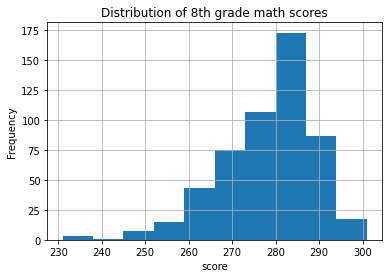

In [52]:
df.AVG_MATH_8_SCORE.hist()
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of 8th grade math scores')

Histogram showing the distribution of 8th grade math scores

Visualization 2

Text(0.5, 1.0, '8th grade math score over time')

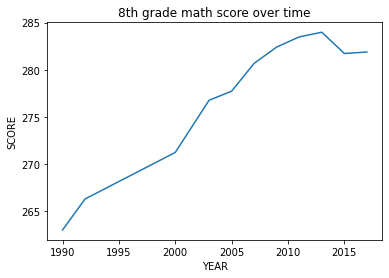

In [56]:
df.groupby("YEAR").AVG_MATH_8_SCORE.mean().plot()
plt.ylabel('SCORE')
plt.title('8th grade math score over time')

8th grade math score over time

Visualization 3

<AxesSubplot:xlabel='ENROLL_ALL', ylabel='AVG_MATH_8_SCORE'>

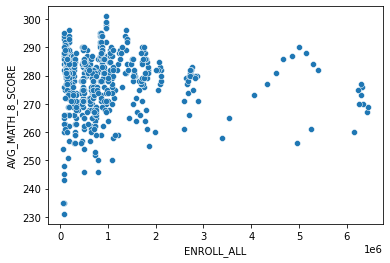

In [57]:
sns.scatterplot(data=df, x="ENROLL_ALL", y="AVG_MATH_8_SCORE")

Scatterplot that plots enrollment vs average 8th grade math store

Visualization 4

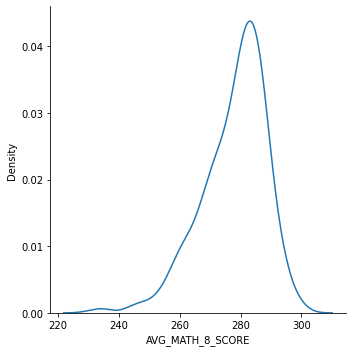

In [61]:
sns.displot(data=df, x="AVG_MATH_8_SCORE", kind="kde")

Shows the "smooth" version of the histogram from before

Visualization 4

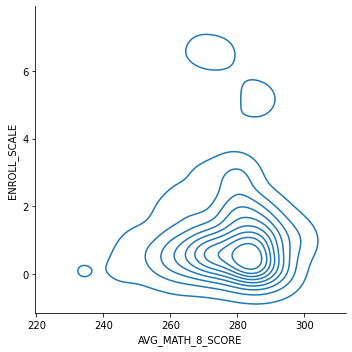

In [62]:
sns.displot(data=df, x="AVG_MATH_8_SCORE", y="ENROLL_SCALE", kind="kde")

Just for fun, did the KDE of both the math score and the scaled enrollment!

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X = df[['TOTAL_REVENUE','ENROLL_SCALE','ENROLL_8','YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.25, random_state=0)

<h2> Prediction </h2>

Chosen ML task: Regression

In [90]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [91]:
# create your model here
model = LinearRegression()

In [92]:
model.fit(X_train, y_train)

LinearRegression()

In [93]:
y_pred = model.predict(X_test)

In [79]:
# NOTE: skipped
# for classification:
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(model, X_test, y_test,
#                         cmap=plt.cm.Blues)

Text(0, 0.5, 'Math 8 Score')

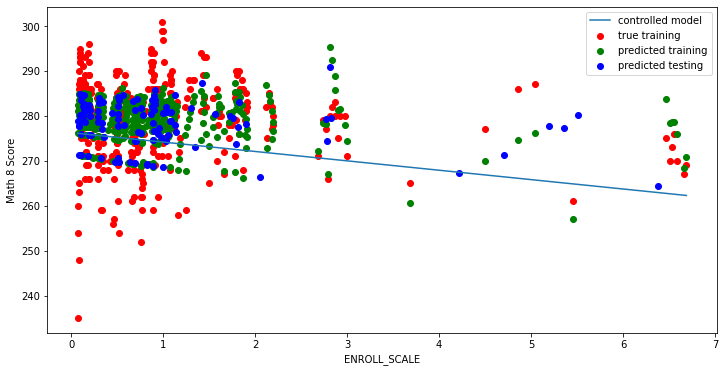

In [94]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'ENROLL_SCALE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')

In [80]:
model.score(X_test, y_test)

0.08181818181818182

In [81]:
np.mean(model.predict(X_test)-y_test)

-0.9

In [82]:
np.mean(np.abs(model.predict(X_test)-y_test))

9.590909090909092

In [83]:
np.mean((model.predict(X_test)-y_test)**2)**0.5

13.433675459963903

<h2> Summary </h2>

I compared 8th grade math scores against enrollment, and the trained model was unfortunately not accurate at all. As you can see, I had an r^2 value of 0.0818, which means almost no correlation. Additionally, the various mean errors were very large, which showed that my model had large variability. Therefore, I can conclude that there is not much correlation between enrollment and 8th grade math scores. I had initially though that more enrollment meant a bigger, richer school, thus leading to potentially higher scores. But I suppose that a larger school may have overall lower averages because the vast amount of students make it difficult to get really high averages.